In [239]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os
from glob import glob
import pandas as pd
from scipy.signal import savgol_filter
import matplotlib.image as mpimg


In [100]:
files = glob('../../data/7_2p/*.tif')

../../data/7_2p/file_00016.tif 4000


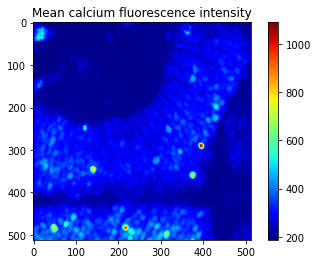

../../data/7_2p/file_00002.tif 186


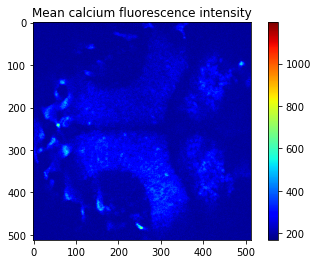

../../data/7_2p/file_00003.tif 377


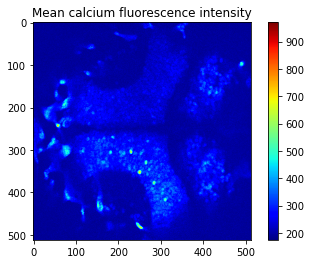

../../data/7_2p/file_00001.tif 168


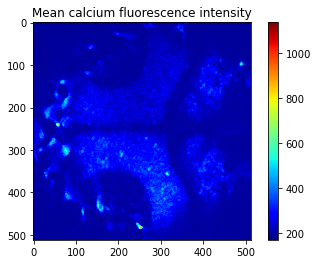

../../data/7_2p/file_00015.tif 4000


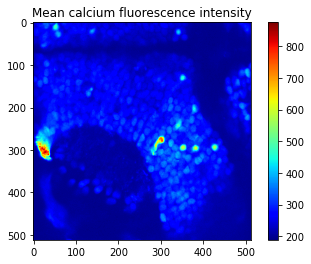

../../data/7_2p/file_00014.tif 4000


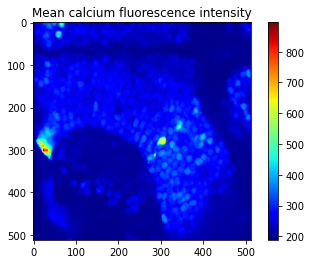

../../data/7_2p/file_00004.tif 2000


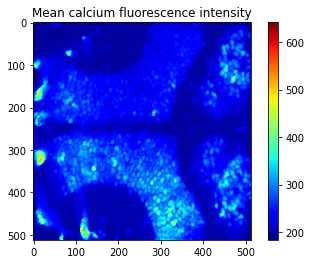

../../data/7_2p/file_00010.tif 4000


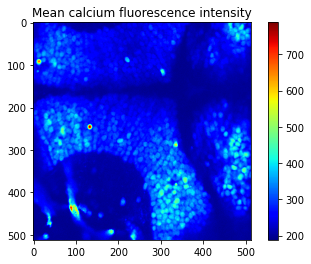

../../data/7_2p/file_00011.tif 4000


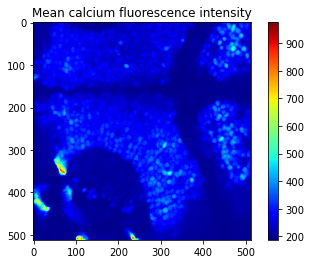

../../data/7_2p/file_00005.tif 102


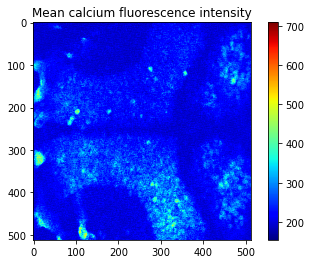

../../data/7_2p/file_00013.tif 4000


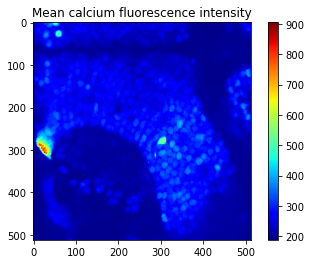

../../data/7_2p/file_00007.tif 2000


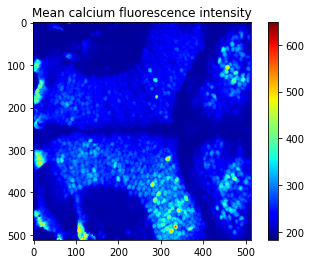

../../data/7_2p/file_00006.tif 2000


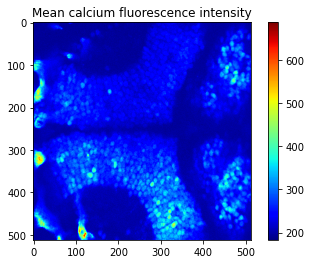

../../data/7_2p/file_00012.tif 4000


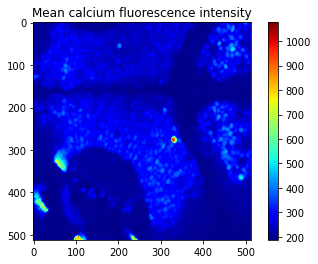

../../data/7_2p/file_00008.tif 2000


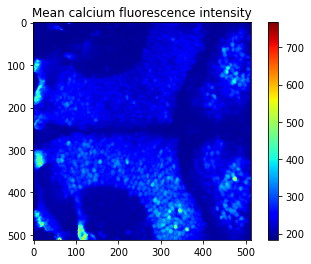

../../data/7_2p/file_00009.tif 4000


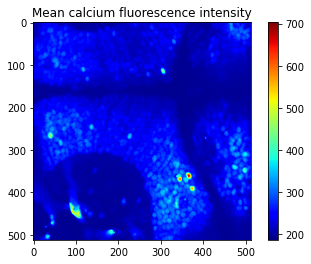

In [221]:
for file in files:
    
    volim = imageio.volread(file)
    n_frames = volim.shape[0]
    print(file, n_frames)
    fish_data=volim[0:n_frames:2,:,:] 
    mean_fish_data=np.mean(fish_data,axis=0)

#     stim_data=volim[1:4000:2,:,:]
#     mean_stim_data=np.mean(stim_data,axis=1)
#     mean_stim_data=np.mean(mean_stim_data,axis=1)

#     t = np.linspace(1,2000,2000)

    figure,ax=plt.subplots()
    plt.imshow(mean_fish_data, cmap='jet')
    plt.title('Mean calcium fluorescence intensity')
    plt.colorbar()
    plt.show()


In [ ]:
#############file_00016############

In [669]:
volim = imageio.volread('../../data/7_2p/file_00016.tif')
ROI_df = pd.read_csv('../../data/7_2p/016_ROI.csv')  


In [670]:
print('The shape of the data is: ', np.shape(volim))
print('i.e. there are 1000 planes with dimension 64 x 256')

The shape of the data is:  (4000, 512, 512)
i.e. there are 1000 planes with dimension 64 x 256


In [671]:
n_frames = volim.shape[0]
fish_data=volim[0:n_frames:2,:,:] 
mean_fish_data=np.mean(fish_data,axis=0)

stim_data=volim[1:n_frames:2,:,:]
mean_stim_data=np.mean(stim_data,axis=1)
mean_stim_data=np.mean(mean_stim_data,axis=1)

t = np.linspace(1,int(n_frames/2),int(n_frames/2))

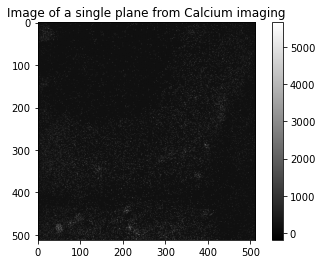

In [672]:
### Let's plot just one frame of the green channel for visualization
plt.imshow(fish_data[300,:,:], cmap='gray') ### plotting frame 320 out of 500 in this dataset
plt.title('Image of a single plane from Calcium imaging')
plt.colorbar()
plt.show()

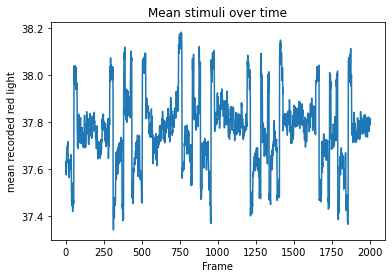

In [673]:
plt.plot(t, mean_stim_data)
plt.title('Mean stimuli over time')
plt.xlabel('Frame')
plt.ylabel('mean recorded red light')


plt.show()

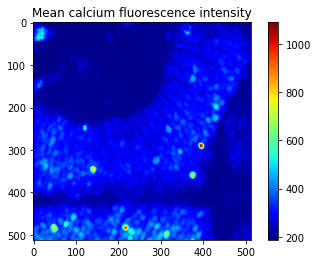

In [674]:

## Can you guess the size of the variable "mean_fish_data"?

### plotting mean calcium activity. 
figure,ax=plt.subplots()
plt.imshow(mean_fish_data, cmap='jet')
plt.title('Mean calcium fluorescence intensity')
plt.colorbar()
plt.show()

In [675]:
num_of_ROIs = int(len(ROI_df.columns)/4)
    
col_list = [(ROI*4) + 2 for ROI in range(num_of_ROIs)]

mean_ROI_fluor_per_frame = ROI_df.iloc[:,col_list]

ca_activity_data = mean_ROI_fluor_per_frame.values[0:n_frames:2,:] 


delta_F_over_F = lambda data, baseline: (data-baseline)/baseline
get_baseline = lambda data: np.percentile(data,8) 


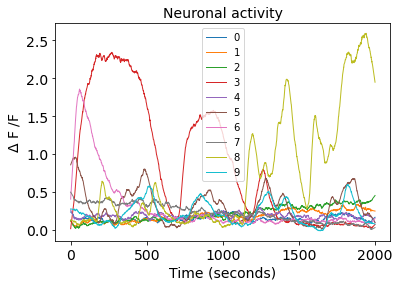

In [676]:
#sampling_rate=1.6

x_axis=np.arange(n_frames/2) 


for ROI_i in range(num_of_ROIs):
    
    baseline = get_baseline(ca_activity_data[:,ROI_i])
    delta_F = delta_F_over_F(ca_activity_data[:,ROI_i], baseline)
    plt.plot(x_axis,
             savgol_filter(delta_F , 35, 1), 
             label=ROI_i,
             linewidth=1)
    
plt.xlabel('Time (seconds)',fontsize=14)
plt.ylabel(r'$\Delta$ F /F',fontsize=14)
plt.title('Neuronal activity',fontsize=14)
#plt.autoscale(enable=True, axis='x', tight=True)
plt.tick_params(labelsize=14)
plt.legend()
plt.show()

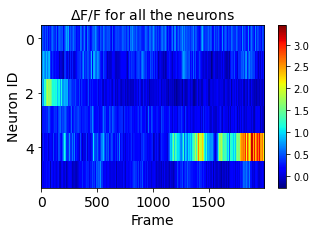

In [678]:
baseline_matrix = get_baseline(ca_activity_data)
delta_F_over_F_matrix = delta_F_over_F(ca_activity_data, baseline_matrix)


fig,ax = pl.subplots(figsize=(5, 3))
im=ax.imshow(delta_F_over_F_matrix.T[4:,:], interpolation='nearest',cmap='jet')
ax.set_aspect('auto')
plt.colorbar(im);

plt.ylabel('Neuron ID',fontsize=14)
plt.xlabel('Frame',fontsize=14)

plt.title(r'$\Delta$F/F for all the neurons',fontsize=14)
plt.grid(False) 
plt.autoscale(enable=True, axis='x', tight=True)
plt.tick_params(labelsize=14)

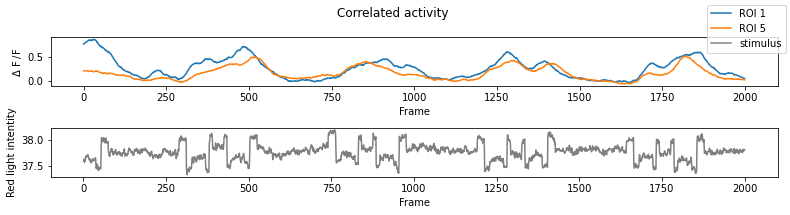

In [688]:

fig, ax = plt.subplots(2,1,figsize=(11,3))
plt.suptitle('Correlated activity')
ax[0].plot(x_axis, 
        savgol_filter(delta_F_over_F_matrix[:,5], 35, 1),
       label='ROI 1')

ax[0].plot(x_axis, 
        savgol_filter(delta_F_over_F_matrix[:,9], 35, 1),
        label='ROI 5')
ax[0].set_xlabel('Frame')
ax[0].set_ylabel(r'$\Delta$ F /F')


ax[1].plot(t, mean_stim_data, color='grey',
           label='stimulus')
ax[1].set_xlabel('Frame')
ax[1].set_ylabel('Red light intentity')

fig.legend()
plt.tight_layout()

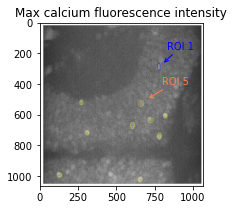

In [747]:
fig, ax = plt.subplots(figsize=(4,3))

img = mpimg.imread('../../data/7_2p/016.png')
plt.imshow(img)
plt.title('Max calcium fluorescence intensity')
plt.annotate("ROI 1",
            xy=(800, 270), xycoords='data',color='blue',
            xytext=(5, 15), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='blue'))

plt.annotate("ROI 5",
            xy=(700, 500), xycoords='data',color='coral',
            xytext=(15, 15), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",color='coral'))

plt.show()

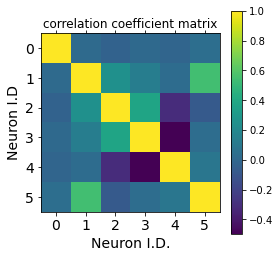

In [687]:
### Let us now generate correlation coefficient matrix and plot it
corr_coef_matrix=np.corrcoef(delta_F_over_F_matrix.T[4:,:]) 

plt.figsize=(3,3)

plt.matshow(corr_coef_matrix) 
plt.colorbar()

plt.ylabel('Neuron I.D',fontsize=14)
plt.xlabel('Neuron I.D.',fontsize=14)
plt.tick_params(labelbottom=True,labeltop=False)
plt.tick_params(labelsize=14)
plt.title('correlation coefficient matrix')

plt.show()


In [ ]:
#############file_00010############

In [457]:
volim = imageio.volread('../../data/7_2p/file_00010.tif')
ROI_df = pd.read_csv('../../data/7_2p/010_ROI.csv')  


In [458]:
n_frames = volim.shape[0]
fish_data=volim[0:n_frames:2,:,:] 
mean_fish_data=np.mean(fish_data,axis=0)

stim_data=volim[1:n_frames:2,:,:]
mean_stim_data=np.mean(stim_data,axis=1)
mean_stim_data=np.mean(mean_stim_data,axis=1)

t = np.linspace(1,int(n_frames/2),int(n_frames/2))

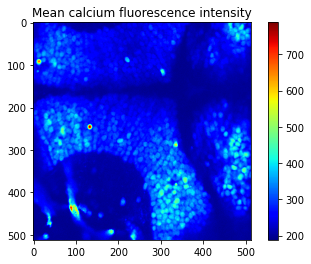

In [459]:

## Can you guess the size of the variable "mean_fish_data"?

### plotting mean calcium activity. 
figure,ax=plt.subplots()
plt.imshow(mean_fish_data, cmap='jet')
plt.title('Mean calcium fluorescence intensity')
plt.colorbar()
plt.show()

## 0 is the top most (middle), 1 is to its right, 2 red dot

In [460]:
num_of_ROIs = int(len(ROI_df.columns)/4)
    
col_list = [(ROI*4) + 2 for ROI in range(num_of_ROIs)]

mean_ROI_fluor_per_frame = ROI_df.iloc[:,col_list]

ca_activity_data = mean_ROI_fluor_per_frame.values[0:n_frames:2,:] 



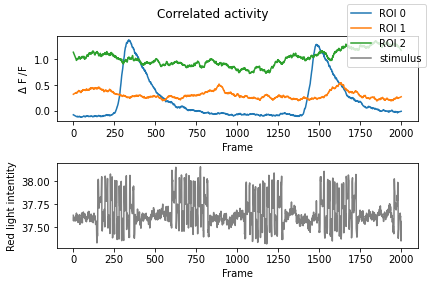

In [461]:

fig, ax = plt.subplots(2,1,)
plt.suptitle('Correlated activity')

baseline = get_baseline(ca_activity_data)
delta_F = delta_F_over_F(ca_activity_data, baseline)

ax[0].plot(x_axis, 
        savgol_filter(delta_F[:,0], 35, 1),
       label='ROI 0')


ax[0].plot(x_axis, 
        savgol_filter(delta_F[:,1], 35, 1),
       label='ROI 1')

ax[0].plot(x_axis, 
        savgol_filter(delta_F[:,2], 35, 1),
        label='ROI 2')

ax[0].set_xlabel('Frame')
ax[0].set_ylabel(r'$\Delta$ F /F')


ax[1].plot(t, mean_stim_data, color='grey',
           label='stimulus')
ax[1].set_xlabel('Frame')
ax[1].set_ylabel('Red light intentity')

fig.legend()
plt.tight_layout()

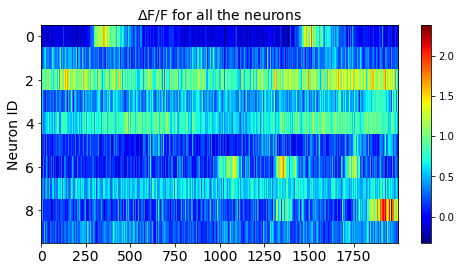

In [462]:
baseline_matrix = get_baseline(ca_activity_data)
delta_F_over_F_matrix = delta_F_over_F(ca_activity_data, baseline_matrix)


fig,ax = pl.subplots(figsize=(8, 4))
im=ax.imshow(delta_F_over_F_matrix.T, interpolation='nearest',cmap='jet')
ax.set_aspect('auto')
plt.colorbar(im);

plt.ylabel('Neuron ID',fontsize=14)
plt.title(r'$\Delta$F/F for all the neurons',fontsize=14)
plt.grid(False) 
plt.autoscale(enable=True, axis='x', tight=True)
plt.tick_params(labelsize=14)


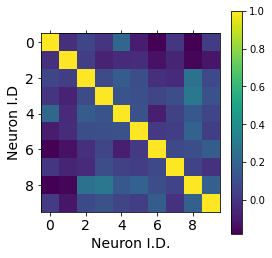

In [463]:
### Let us now generate correlation coefficient matrix and plot it

corr_coef_matrix=np.corrcoef(delta_F_over_F_matrix.T) 
plt.matshow(corr_coef_matrix) 
plt.colorbar()

plt.ylabel('Neuron I.D',fontsize=14)
plt.xlabel('Neuron I.D.',fontsize=14)
plt.tick_params(labelbottom=True,labeltop=False)
plt.tick_params(labelsize=14)
plt.show()


In [466]:
fish_data.shape

(2000, 512, 512)

In [556]:

down_size_fish_data = fish_data.reshape((2000, 32, 16, 32, 16)).mean(-1).mean(2)
down_size_fish_data_mean = np.mean(down_size_fish_data,axis=0)

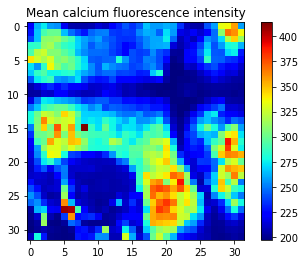

In [557]:

## reduced size [64*64]
figure,ax=plt.subplots()
plt.imshow(down_size_fish_data_mean, cmap='jet')
plt.title('Mean calcium fluorescence intensity')
plt.colorbar()
plt.show()


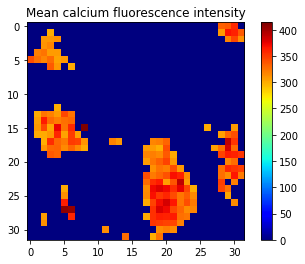

In [561]:
thresh = 300
mean_above_thresh = np.where(down_size_fish_data_mean>thresh,down_size_fish_data_mean, 0)
mean_above_thresh_id = np.where(down_size_fish_data_mean>thresh)
figure,ax=plt.subplots()
plt.imshow(mean_above_thresh, cmap='jet')
plt.title('Mean calcium fluorescence intensity')
plt.colorbar()
plt.show()


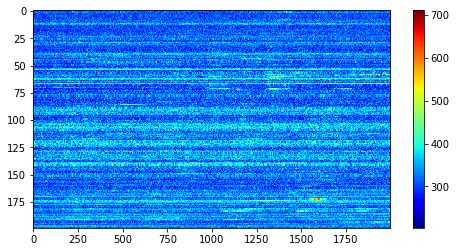

In [562]:
mat = np.where(np.mean(down_size_fish_data,axis=0)>thresh, down_size_fish_data, 0)#.reshape(2000, 64*64)
mat_flat = []
for i in range(32):
    for j in range(32):
        if mat.T[i][j][0]!=0:
            mat_flat.append(mat.T[i][j])

            
fig,ax = pl.subplots(figsize=(8, 4))
im=ax.imshow(np.array(mat_flat), interpolation='nearest',cmap='jet')
ax.set_aspect('auto')
plt.colorbar(im);

# # plt.ylabel('Neuron ID',fontsize=14)
# plt.title(r'$\Delta$F/F for all the neurons',fontsize=14)
# plt.grid(False) 
# plt.autoscale(enable=True, axis='x', tight=True)
# plt.tick_params(labelsize=14)


In [581]:
############ 009 ##########

In [692]:
volim = imageio.volread('../../data/7_2p/file_00009.tif')
ROI_df = pd.read_csv('../../data/7_2p/009_ROI.csv')  


In [693]:
num_of_ROIs = int(len(ROI_df.columns)/4)
    
col_list = [(ROI*4) + 2 for ROI in range(num_of_ROIs)]

mean_ROI_fluor_per_frame = ROI_df.iloc[:,col_list]

ca_activity_data = mean_ROI_fluor_per_frame.values[0:n_frames:2,:] 


In [694]:
baseline_matrix = get_baseline(ca_activity_data)
delta_F_over_F_matrix = delta_F_over_F(ca_activity_data, baseline_matrix)


In [695]:
# sub_delta_F_over_F_matrix = np.vstack((delta_F_over_F_matrix.T[0:2],
#            delta_F_over_F_matrix.T[3:5],
#           delta_F_over_F_matrix.T[6:8],
#            delta_F_over_F_matrix.T[11]))
# shift_sub_delta_F_over_F_matrix = np.roll(sub_delta_F_over_F_matrix.T,1).T

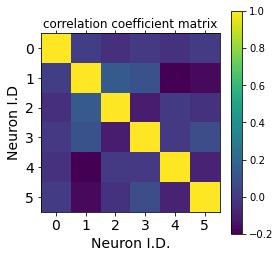

In [696]:
### Let us now generate correlation coefficient matrix and plot it
corr_coef_matrix=np.corrcoef(delta_F_over_F_matrix.T[5:-1]) 

plt.figsize=(3,3)

plt.matshow(corr_coef_matrix) 
plt.colorbar()

plt.ylabel('Neuron I.D',fontsize=14)
plt.xlabel('Neuron I.D.',fontsize=14)
plt.tick_params(labelbottom=True,labeltop=False)
plt.tick_params(labelsize=14)
plt.title('correlation coefficient matrix')

plt.show()


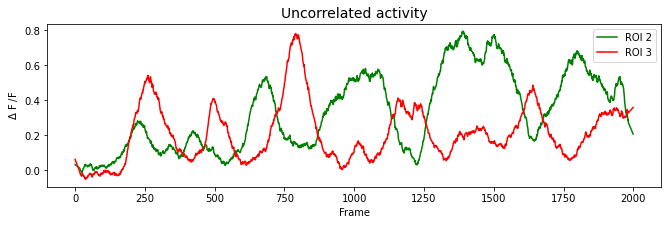

In [697]:
### There are two groups of neurons as seen in this dataset using imagej. Let us now plot them.

fig,ax=plt.subplots(figsize=(11,3))
plt.plot(x_axis, 
        savgol_filter(delta_F_over_F_matrix[:,7], 35, 1),
       label='ROI 2', color='green')
plt.plot(x_axis, 
        savgol_filter(delta_F_over_F_matrix[:,8], 35, 1),
       label='ROI 3', color='red')

plt.xlabel('Frame')
plt.ylabel(r'$\Delta$ F /F')
plt.title('Uncorrelated activity',fontsize=14)
plt.legend()
plt.show()

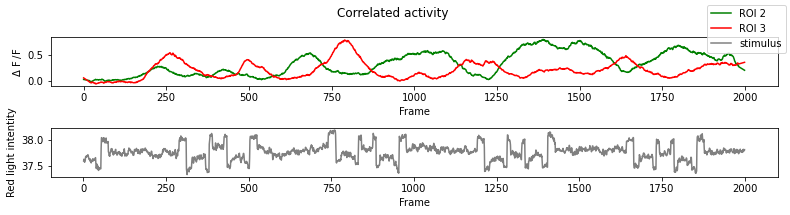

In [701]:

fig, ax = plt.subplots(2,1,figsize=(11,3))
plt.suptitle('Correlated activity')
ax[0].plot(x_axis, 
        savgol_filter(delta_F_over_F_matrix[:,7], 35, 1),
       label='ROI 2', color='green')

ax[0].plot(x_axis, 
        savgol_filter(delta_F_over_F_matrix[:,8], 35, 1),
       label='ROI 3', color='red')

ax[0].set_xlabel('Frame')
ax[0].set_ylabel(r'$\Delta$ F /F')


ax[1].plot(t, mean_stim_data, color='grey',
           label='stimulus')
ax[1].set_xlabel('Frame')
ax[1].set_ylabel('Red light intentity')

fig.legend()
plt.tight_layout()

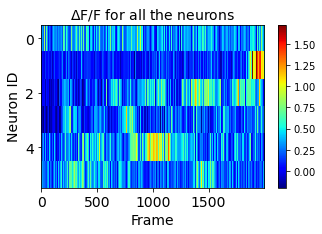

In [748]:
fig,ax = pl.subplots(figsize=(5, 3))
im=ax.imshow(delta_F_over_F_matrix.T[5:-1,], interpolation='nearest',cmap='jet')
ax.set_aspect('auto')
plt.colorbar(im);

plt.ylabel('Neuron ID',fontsize=14)
plt.xlabel(r'Frame',fontsize=14)

plt.title(r'$\Delta$F/F for all the neurons',fontsize=14)
plt.grid(False) 
plt.autoscale(enable=True, axis='x', tight=True)
plt.tick_params(labelsize=14)


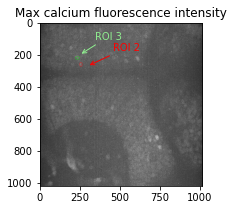

In [720]:
fig, ax = plt.subplots(figsize=(4,3))

img = mpimg.imread('../../data/7_2p/009.png')
plt.imshow(img)
plt.title('Max calcium fluorescence intensity')
plt.annotate("ROI 2",
            xy=(300, 270), xycoords='data',color='red',
            xytext=(25, 15), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='red'))

plt.annotate("ROI 3",
            xy=(250, 200), xycoords='data',color='lightgreen',
            xytext=(15, 15), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='lightgreen'))

plt.show()